In [135]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [136]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [137]:
from datetime import datetime, timedelta
d = datetime.today() - timedelta(days=1)
fecha_actual = d.strftime('%m-%d-%Y')
print(fecha_actual)
fecha_actual2 = d.strftime('%Y-%m-%d')
print(fecha_actual2)

11-06-2020
2020-11-06


In [138]:
latest_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/" + fecha_actual + ".csv")
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/'+ fecha_actual + ".csv")

In [139]:
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-11-07 05:24:52,33.939110,67.709953,41975,1554,34440,5981.0,Afghanistan,107.826326,3.702204
1,NaN,NaN,NaN,Albania,2020-11-07 05:24:52,41.153300,20.168300,23210,549,11861,10800.0,Albania,806.518869,2.365360
2,NaN,NaN,NaN,Algeria,2020-11-07 05:24:52,28.033900,1.659600,60800,2024,41510,17266.0,Algeria,138.651206,3.328947
3,NaN,NaN,NaN,Andorra,2020-11-07 05:24:52,42.506300,1.521800,5135,75,3858,1202.0,Andorra,6645.958714,1.460565
4,NaN,NaN,NaN,Angola,2020-11-07 05:24:52,-11.202700,17.873900,12223,300,5626,6297.0,Angola,37.190106,2.454389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,NaN,NaN,NaN,West Bank and Gaza,2020-11-07 05:24:52,31.952200,35.233200,57226,511,49537,7178.0,West Bank and Gaza,1121.766976,0.892951
3956,NaN,NaN,NaN,Western Sahara,2020-11-07 05:24:52,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3957,NaN,NaN,NaN,Yemen,2020-11-07 05:24:52,15.552727,48.516388,2067,602,1375,90.0,Yemen,6.930203,29.124335
3958,NaN,NaN,NaN,Zambia,2020-11-07 05:24:52,-13.133897,27.849332,16819,349,15862,608.0,Zambia,91.487382,2.075034


In [140]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [141]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,0,0,0,0,0,0,0,0,0,0,...,41145,41268,41334,41425,41501,41633,41728,41814,41935,41975
1,0,0,0,0,0,0,0,0,0,0,...,20040,20315,20634,20875,21202,21523,21904,22300,22721,23210
2,0,0,0,0,0,0,0,0,0,0,...,57026,57332,57651,57942,58272,58574,58979,59527,60169,60800
3,0,0,0,0,0,0,0,0,0,0,...,4517,4567,4665,4756,4825,4888,4910,5045,5135,5135
4,0,0,0,0,0,0,0,0,0,0,...,10074,10269,10558,10805,11035,11228,11577,11813,12102,12223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,0,0,0,0,0,0,0,0,...,51948,52571,53075,53520,54060,54775,55408,56090,56672,57226
264,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,0,0,0,0,0,0,0,0,0,0,...,2061,2062,2062,2063,2063,2063,2063,2063,2063,2067
266,0,0,0,0,0,0,0,0,0,0,...,16285,16325,16415,16432,16480,16543,16661,16698,16770,16819


In [142]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,0,0,0,0,0,0,0,0,0,0,...,1529,1532,1533,1536,1536,1541,1544,1548,1554,1554
1,0,0,0,0,0,0,0,0,0,0,...,493,499,502,509,518,527,532,536,543,549
2,0,0,0,0,0,0,0,0,0,0,...,1941,1949,1956,1964,1973,1980,1980,1999,2011,2024
3,0,0,0,0,0,0,0,0,0,0,...,72,73,75,75,75,75,75,75,75,75
4,0,0,0,0,0,0,0,0,0,0,...,275,275,279,284,286,289,291,296,299,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0,0,0,0,0,0,0,0,0,0,...,465,473,481,483,489,493,501,504,508,511
264,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
265,0,0,0,0,0,0,0,0,0,0,...,599,599,599,599,600,601,601,601,601,602
266,0,0,0,0,0,0,0,0,0,0,...,348,348,349,349,349,349,349,349,349,349


In [143]:
recoveries

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20
0,0,0,0,0,0,0,0,0,0,0,...,34237,34239,34258,34321,34326,34342,34355,34362,34440,34440
1,0,0,0,0,0,0,0,0,0,0,...,10893,11007,11097,11189,11246,11367,11473,11578,11696,11861
2,0,0,0,0,0,0,0,0,0,0,...,39635,39635,40014,40201,40395,40577,40577,41001,41244,41510
3,0,0,0,0,0,0,0,0,0,0,...,3144,3260,3377,3475,3475,3548,3627,3734,3858,3858
4,0,0,0,0,0,0,0,0,0,0,...,3693,3736,4107,4523,4920,5172,5230,5266,5350,5626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,0,0,0,0,...,44985,45448,45896,46309,46773,47169,47744,48224,48680,49537
251,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
252,0,0,0,0,0,0,0,0,0,0,...,1366,1366,1366,1366,1366,1375,1375,1375,1375,1375
253,0,0,0,0,0,0,0,0,0,0,...,15559,15585,15600,15680,15733,15733,15763,15819,15827,15862


In [144]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

window = 7

world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

world_active_avg = moving_average(total_active, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
days_in_future = 50
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-50]

In [145]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [146]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False) 

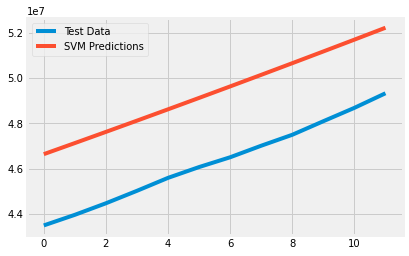

In [147]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])


In [148]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)


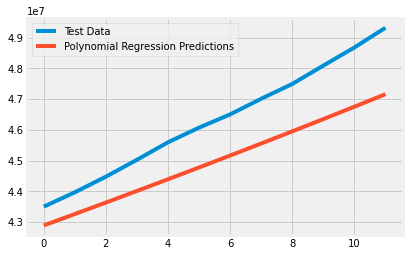

In [149]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished


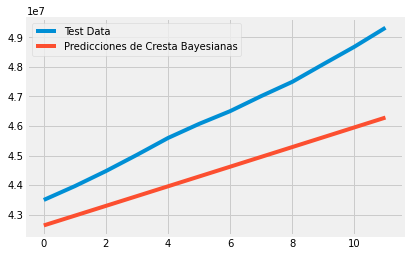

In [150]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Predicciones de Cresta Bayesianas'])

In [151]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bayesian_search, y_test_confirmed, test_bayesian_pred, cv=4)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*-1, scores.std() * 2))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy: 589765151464.41 (+/- 1017421251922.36)


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished


[186066.93240979]
[-15431049.83935085]


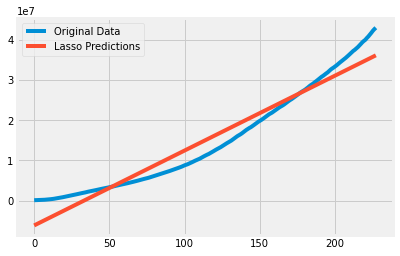

In [204]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train_confirmed, y_train_confirmed)
print(clf.coef_)
print(clf.intercept_)
testlassopredict = clf.predict(X_train_confirmed)
plt.plot(y_train_confirmed)
plt.plot(testlassopredict)
plt.legend(['Original Data', 'Lasso Predictions'])

In [205]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, y_train_confirmed, testlassopredict, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -3.89 (+/- 8.54)


In [206]:
lasso_pred = clf.predict(future_forcast)


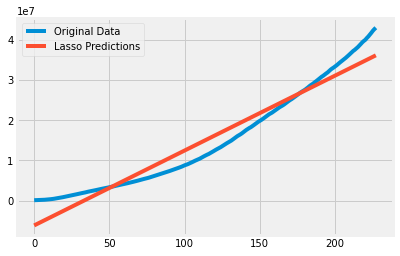

In [155]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
reg = LassoCV(cv=5, random_state=0).fit(X_train_confirmed, y_train_confirmed)
#reg.score(X, y)
testlassoCVpredict = reg.predict(X_train_confirmed)
plt.plot(y_train_confirmed)
plt.plot(testlassopredict)
plt.legend(['Original Data', 'Lasso Predictions'])


In [156]:
scores = cross_val_score(reg, X_train_confirmed, testlassoCVpredict, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


1612052.8914429834
14828430.254345922


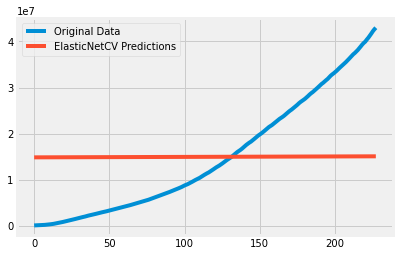

In [157]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
regr = ElasticNetCV(cv=50, random_state=0)
regr.fit(X_train_confirmed, y_train_confirmed)
print(regr.alpha_)
print(regr.intercept_)
test_elasticnet = regr.predict(X_train_confirmed)
plt.plot(y_train_confirmed)
plt.plot(test_elasticnet)
plt.legend(['Original Data', 'ElasticNetCV Predictions'])

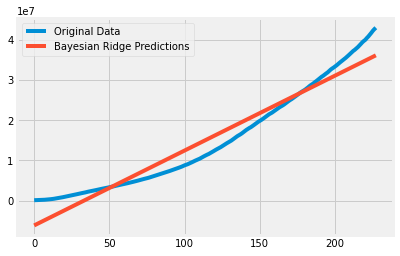

In [158]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train_confirmed, y_train_confirmed)
pred_bayesian_ridge = reg.predict(X_train_confirmed)
plt.plot(y_train_confirmed)
plt.plot(testlassopredict)
plt.legend(['Original Data', 'Bayesian Ridge Predictions'])

In [159]:
scores = cross_val_score(regr, X_train_confirmed, test_elasticnet, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -8.64 (+/- 15.70)


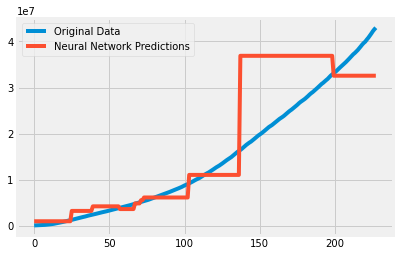

In [193]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=10000000000)
clf.fit(X_train_confirmed, y_train_confirmed)
predictneural = clf.predict(X_train_confirmed)
plt.plot(y_train_confirmed)
plt.plot(predictneural)
plt.legend(['Original Data', 'Neural Network Predictions'])

In [203]:
neuronal_pred = clf.predict(future_forcast)

In [194]:
scores = cross_val_score(clf, X_train_confirmed, predictneural, cv=5)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.27)


In [196]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
    country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
        country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths, country_recoveries)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    country_recoveries = country_info[2]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_daily_recovery, country_name)
    

In [197]:
countries = ['Albania',
'Algeria',
'Andorra',
'Angola',
'Antigua and Barbuda',
'Argentina',
'Armenia',
'Australia',
'Austria',
'Azerbaijan',
'Bahamas',
'Bahrain',
'Bangladesh',
'Barbados',
'Belarus',
'Belgium',
'Belize',
'Benin',
'Bhutan',
'Bolivia',
'Bosnia and Herzegovina',
'Botswana',
'Brazil',
'Brunei',
'Bulgaria',
'Burkina Faso',
'Burma',
'Burundi',
'Cabo Verde',
'Cambodia',
'Cameroon',
'Canada',
'Central African Republic',
'Chad',
'Chile',
'Colombia',
'Comoros',
'Congo (Brazzaville)',
'Congo (Kinshasa)',
'Costa Rica',
'Croatia',
'Cuba',
'Cyprus',
'Czechia',
'Denmark',
'Diamond Princess',
'Djibouti',
'Dominica',
'Dominican Republic',
'Ecuador',
'Egypt',
'El Salvador',
'Equatorial Guinea',
'Eritrea',
'Estonia',
'Eswatini',
'Ethiopia',
'Fiji',
'Finland',
'France',
'Gabon',
'Gambia',
'Georgia',
'Germany',
'Ghana',
'Greece',
'Grenada',
'Guatemala',
'Guinea',
'Guinea-Bissau',
'Guyana',
'Haiti',
'Holy See',
'Honduras',
'Hungary',
'Iceland',
'India',
'Indonesia',
'Iran',
'Iraq',
'Ireland',
'Israel',
'Italy',
'Jamaica',
'Japan',
'Jordan',
'Kazakhstan',
'Kenya',
'Korea, South',
'Kosovo',
'Kuwait',
'Kyrgyzstan',
'Laos',
'Latvia',
'Lebanon',
'Lesotho',
'Liberia',
'Libya',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'MS Zaandam',
'Madagascar',
'Malawi',
'Malaysia',
'Maldives',
'Mali',
'Malta',
'Mauritania',
'Mauritius',
'Mexico',
'Moldova',
'Monaco',
'Mongolia',
'Montenegro',
'Morocco',
'Mozambique',
'Namibia',
'Nepal',
'Netherlands',
'New Zealand',
'Nicaragua',
'Niger',
'Nigeria',
'North Macedonia',
'Norway',
'Oman',
'Pakistan',
'Panama',
'Papua New Guinea',
'Paraguay',
'Peru',
'Philippines',
'Poland',
'Portugal',
'Qatar',
'Romania',
'Russia',
'Rwanda',
'Saint Kitts and Nevis',
'Saint Lucia',
'Saint Vincent and the Grenadines',
'San Marino',
'Sao Tome and Principe',
'Saudi Arabia',
'Senegal',
'Serbia',
'Seychelles',
'Sierra Leone',
'Singapore',
'Slovakia',
'Slovenia',
'Somalia',
'South Africa',
'South Sudan',
'Spain',
'Sri Lanka',
'Sudan',
'Suriname',
'Sweden',
'Switzerland',
'Syria',
'Taiwan*',
'Tajikistan',
'Tanzania',
'Thailand',
'Timor-Leste',
'Togo',
'Trinidad and Tobago',
'Tunisia',
'Turkey',
'US',
'Uganda',
'Ukraine',
'United Arab Emirates',
'United Kingdom',
'Uruguay',
'Uzbekistan',
'Venezuela',
'Vietnam',
'West Bank and Gaza',
'Western Sahara',
'Yemen',
'Zambia',
'Zimbabwe',
] 


In [198]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('COVID-19', size=30)
    plt.xlabel('Iniciando desde el dia 1/22/2020', size=30)
    plt.ylabel('Cantidad de Casos', size=30)
    plt.legend(['Casos Confirmados', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

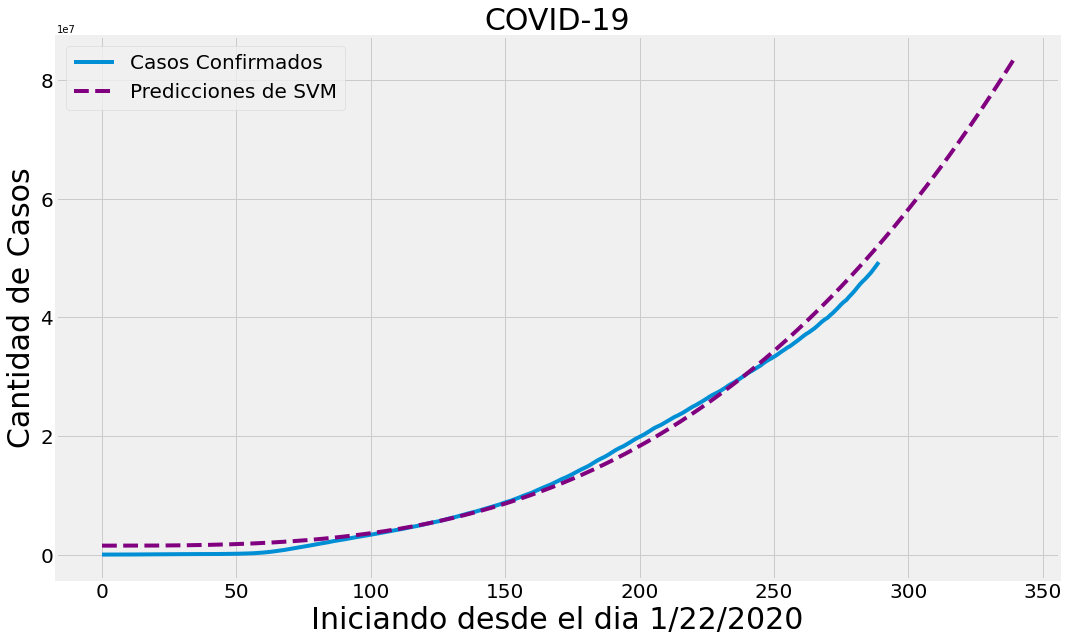

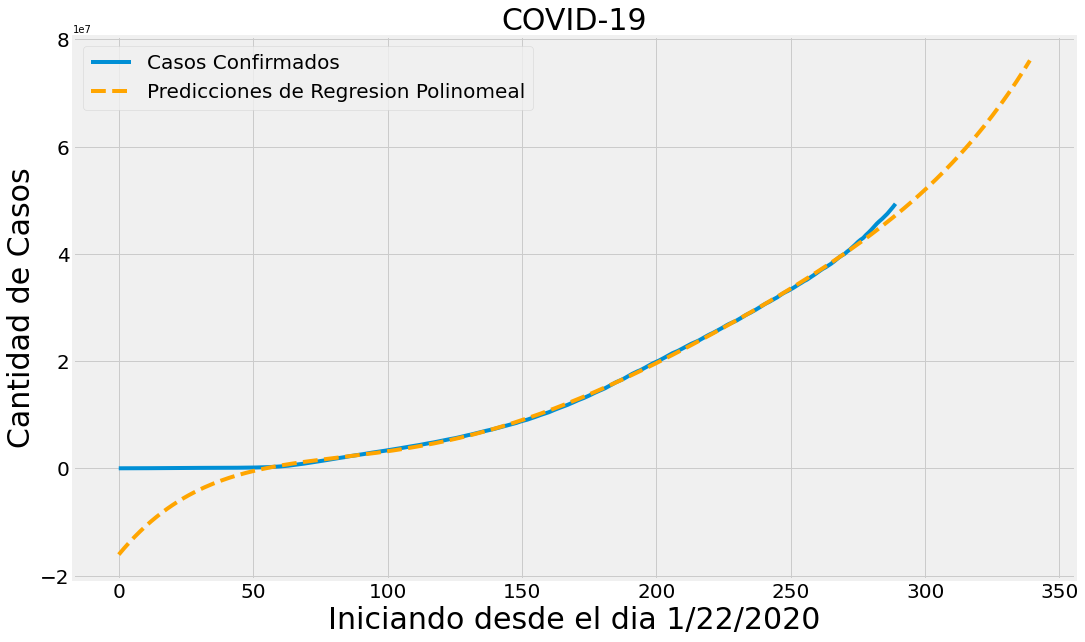

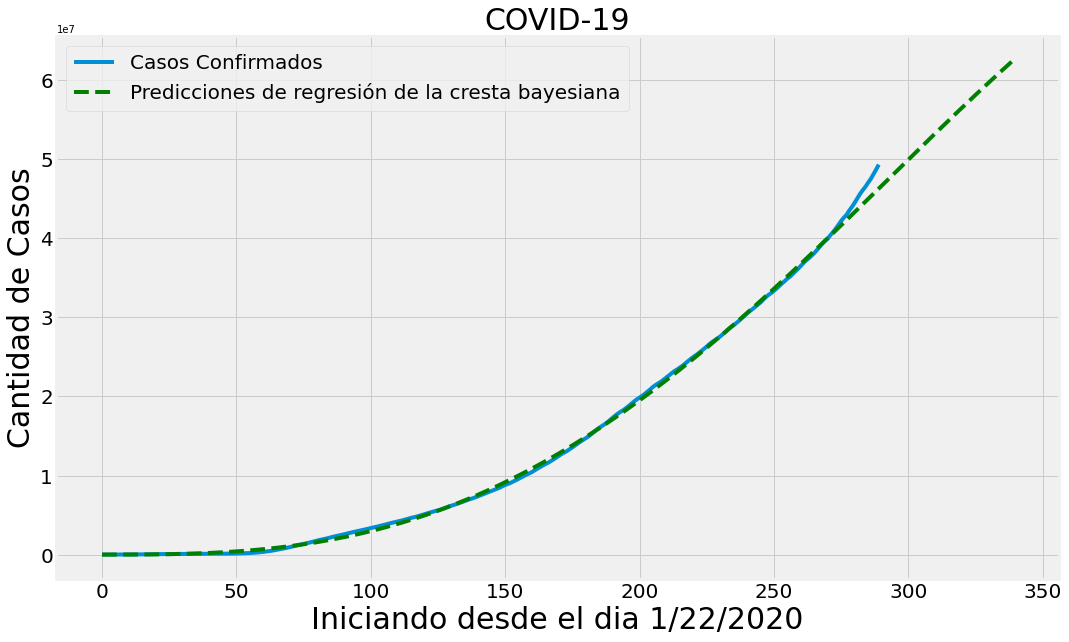

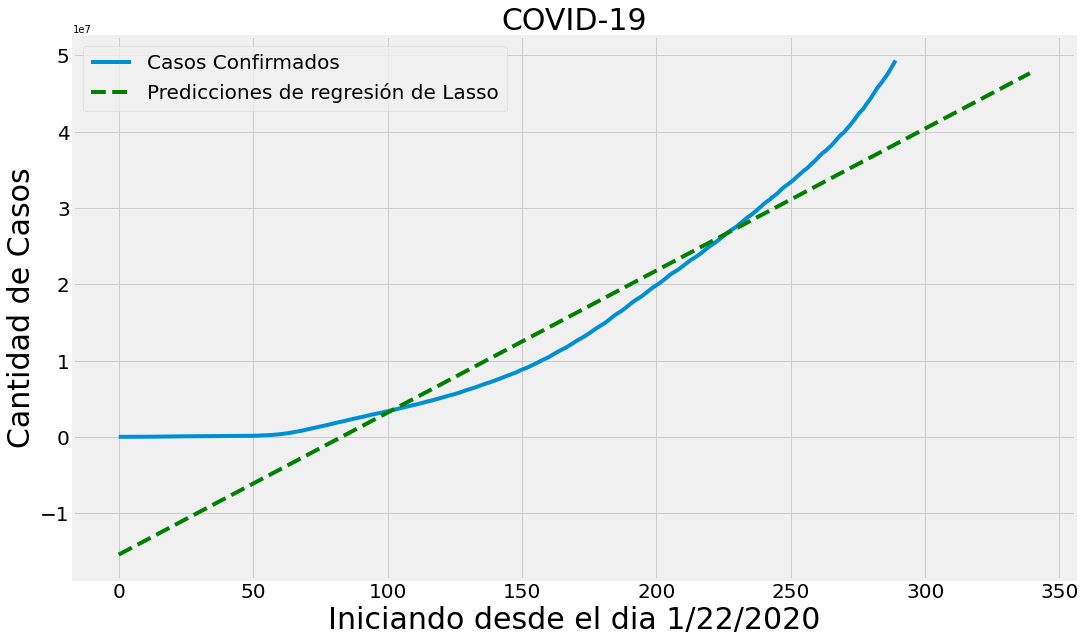

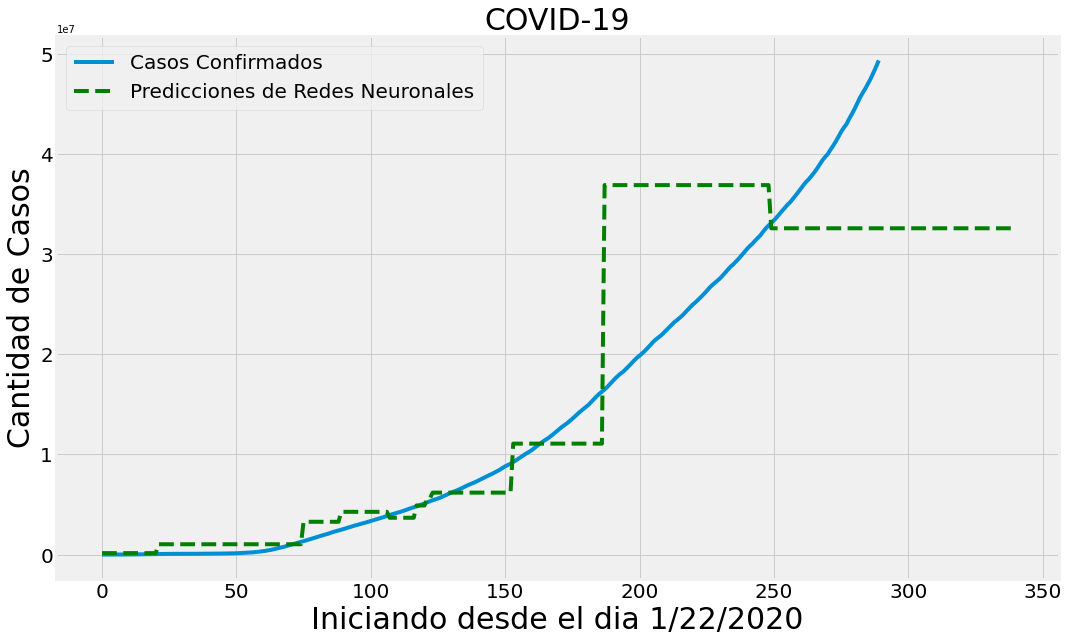

In [207]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'Predicciones de SVM', 'purple')
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Predicciones de Regresion Polinomeal', 'orange')
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Predicciones de regresión de la cresta bayesiana', 'green')
plot_predictions(adjusted_dates, world_cases, lasso_pred, 'Predicciones de regresión de Lasso', 'green')
plot_predictions(adjusted_dates, world_cases, neuronal_pred , 'Predicciones de Redes Neuronales', 'green')

In [22]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22[50:], total_deaths[50:], test_size=0.05, shuffle=False)

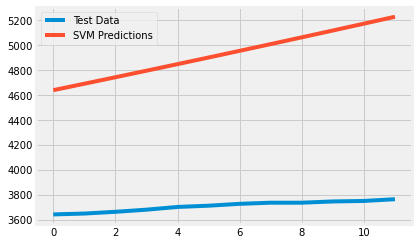

In [223]:
svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_death.fit(X_train_death, y_train_death)
svm_pred_death = svm_death.predict(future_forcast)
svm_test_pred_death = svm_death.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(svm_test_pred_death)
plt.legend(['Test Data', 'SVM Predictions'])


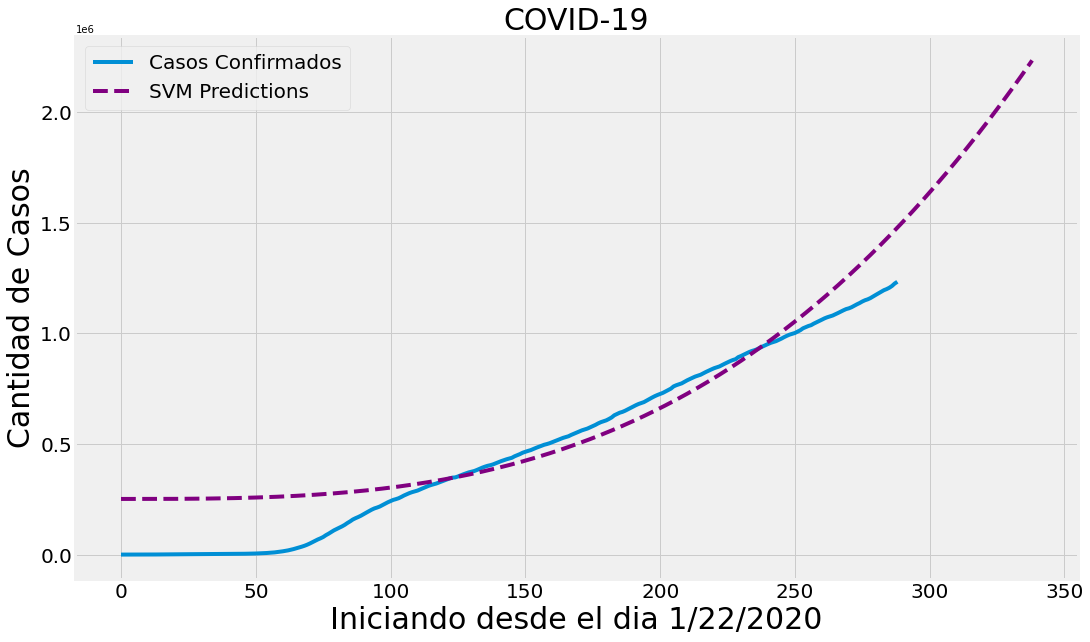

In [24]:
plot_predictions(adjusted_dates, total_deaths, svm_pred_death, 'SVM Predictions', 'purple')

In [25]:
poly = PolynomialFeatures(degree=5)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_death = bayesian_poly.fit_transform(X_train_death)
bayesian_poly_X_test_death = bayesian_poly.fit_transform(X_test_death)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
test_linear_pred = linear_model.predict(poly_X_test_death)
linear_pred_death = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

MAE: 45407.87987115079
MSE: 2401433510.731203


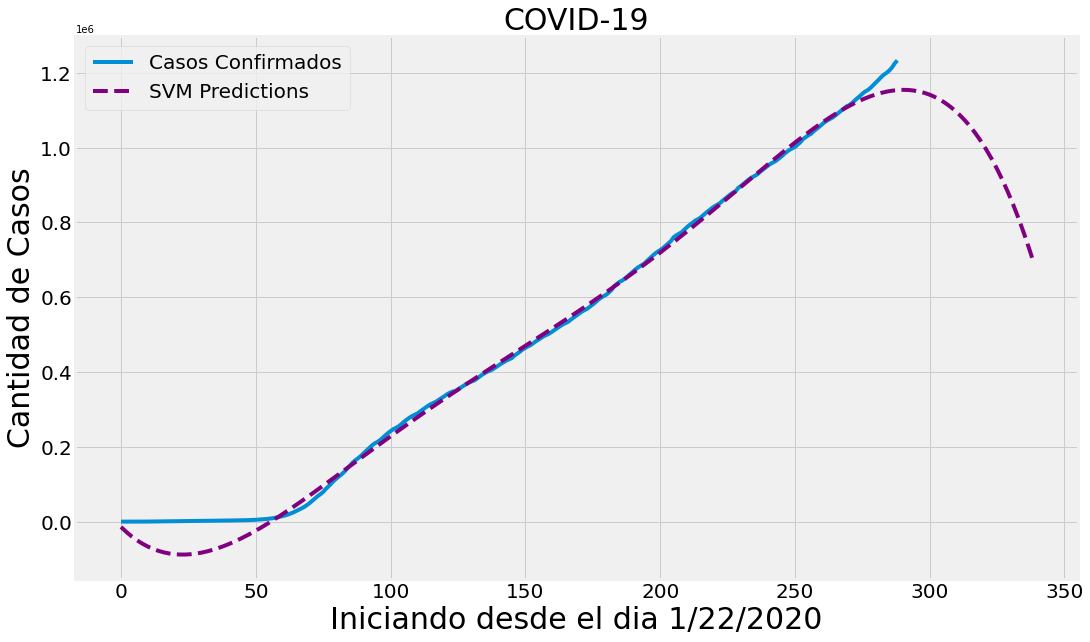

In [26]:
plot_predictions(adjusted_dates, total_deaths, linear_pred_death, 'SVM Predictions', 'purple')

In [27]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_death, y_train_death)
bayesian_search.best_params_
bayesian_death = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_death.predict(bayesian_poly_X_test_death)
bayesian_pred = bayesian_death.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_death))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_death))

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s


MAE: 48604.70763697646
MSE: 2465289644.722313


[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.8s finished


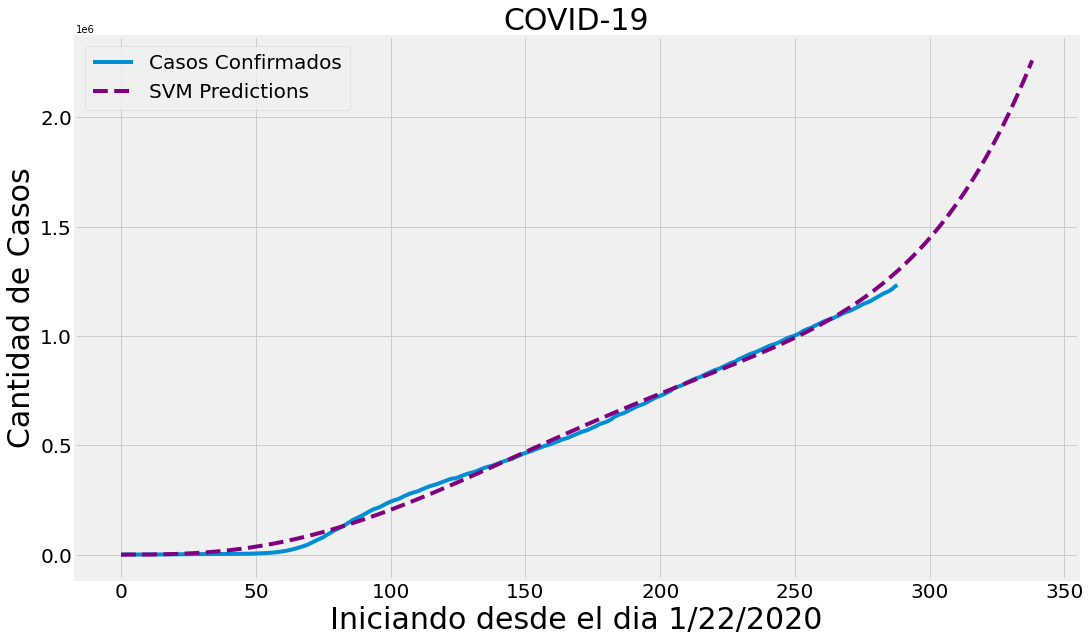

In [28]:
plot_predictions(adjusted_dates, total_deaths, bayesian_pred, 'SVM Predictions', 'purple')

In [29]:
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22[50:], total_recovered[50:], test_size=0.05, shuffle=False)

In [30]:
poly = PolynomialFeatures(degree=5)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_recovered = bayesian_poly.fit_transform(X_train_recovered)
bayesian_poly_X_test_recovered = bayesian_poly.fit_transform(X_test_recovered)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_recovered, y_train_recovered)
test_linear_pred = linear_model.predict(poly_X_test_recovered)
linear_pred_recovered = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred, y_test_recovered))

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_recovered, y_train_recovered)
bayesian_search.best_params_
bayesian_recovered = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_recovered.predict(bayesian_poly_X_test_recovered)
bayesian_pred = bayesian_recovered.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_recovered))

MAE: 942994.3410075012
MSE: 1085145857552.6373
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.6s remaining:    0.0s


MAE: 634542.4180529
MSE: 525956337231.0816


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.7s finished


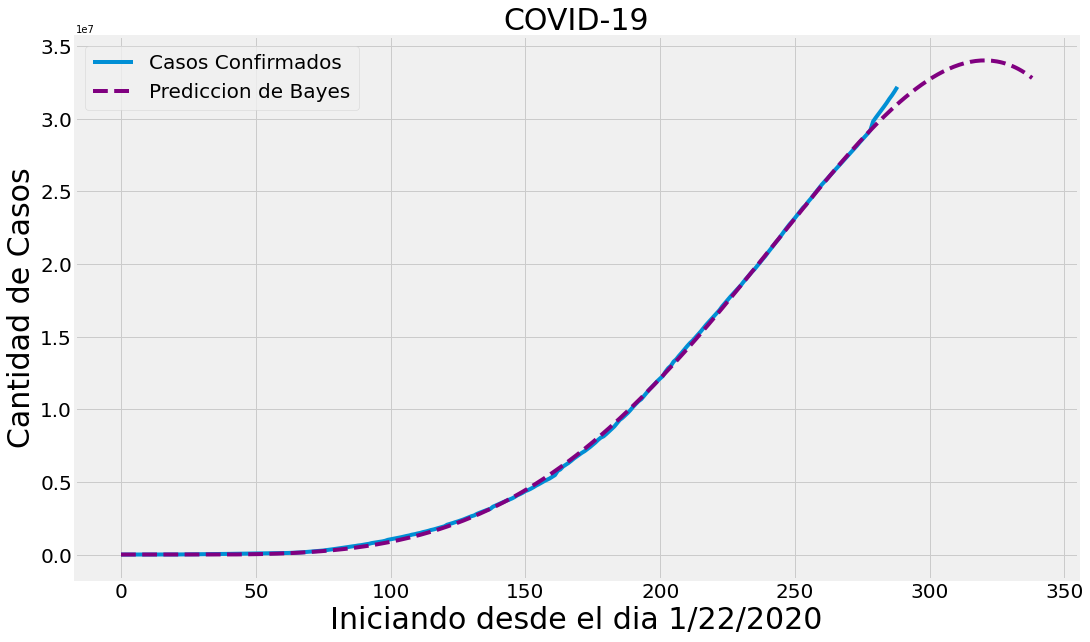

In [31]:
plot_predictions(adjusted_dates, total_recovered, bayesian_pred, 'Prediccion de Bayes', 'purple')

In [32]:
confirmed_df 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,41032,41145,41268,41334,41425,41501,41633,41728,41814,41935
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,19729,20040,20315,20634,20875,21202,21523,21904,22300,22721
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,56706,57026,57332,57651,57942,58272,58574,58979,59527,60169
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,4410,4517,4567,4665,4756,4825,4888,4910,5045,5135
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,9871,10074,10269,10558,10805,11035,11228,11577,11813,12102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,51528,51948,52571,53075,53520,54060,54775,55408,56090,56672
264,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
265,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2060,2061,2062,2062,2063,2063,2063,2063,2063,2063
266,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,16243,16285,16325,16415,16432,16480,16543,16661,16698,16770


In [33]:
confirmado_por_pais =  confirmed_df['Country/Region']=='Guatemala'
confirmado_por_pais = confirmed_df[confirmado_por_pais]
confirmado_por_pais

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
134,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,105571,106320,106790,107339,107939,108104,108104,108483,109147,109849


In [34]:
muertos_por_pais =  deaths_df['Country/Region']=='Guatemala'
muertos_por_pais = deaths_df[muertos_por_pais]
muertos_por_pais

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
134,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,3665,3682,3704,3714,3729,3738,3738,3748,3752,3766


In [35]:
recuperados_por_pais =  recoveries_df['Country/Region']=='Guatemala'
recuperados_por_pais = recoveries_df[recuperados_por_pais]
recuperados_por_pais

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20
121,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,95206,95752,96187,96752,97289,97756,97756,98658,99167,99753


In [36]:
cols = confirmado_por_pais.keys()
confirmed = confirmado_por_pais.loc[:, cols[4]:cols[-1]]
deaths = muertos_por_pais.loc[:, cols[4]:cols[-1]]
recoveries = recuperados_por_pais.loc[:, cols[4]:cols[-1]]

In [37]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

window = 7

world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

world_active_avg = moving_average(total_active, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
days_in_future = 50
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-50]

MAE: 27786.342381450067
MSE: 784677519.7430595


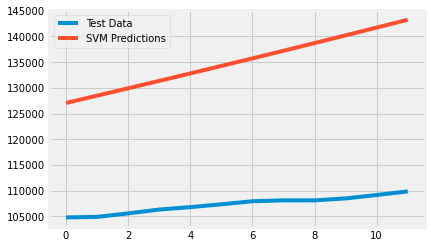

In [38]:
import datetime
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False)
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

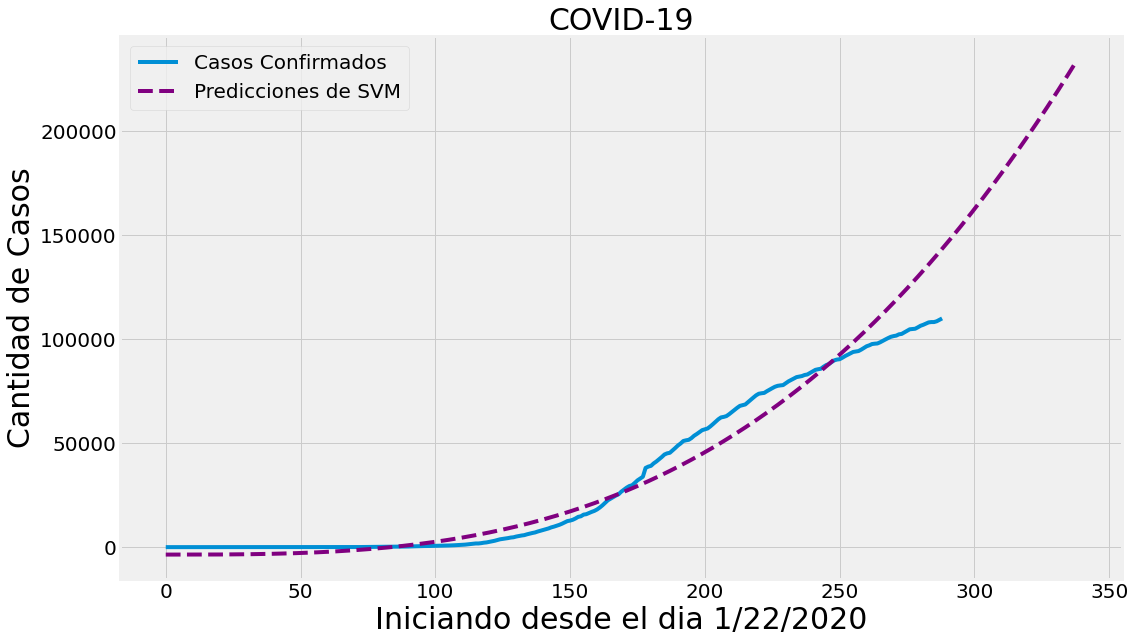

In [39]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'Predicciones de SVM', 'purple')

MAE: 483.0337195348305
MSE: 279600.8681615778
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.6s finished


MAE: 13152.888055415926
MSE: 187618346.54015777


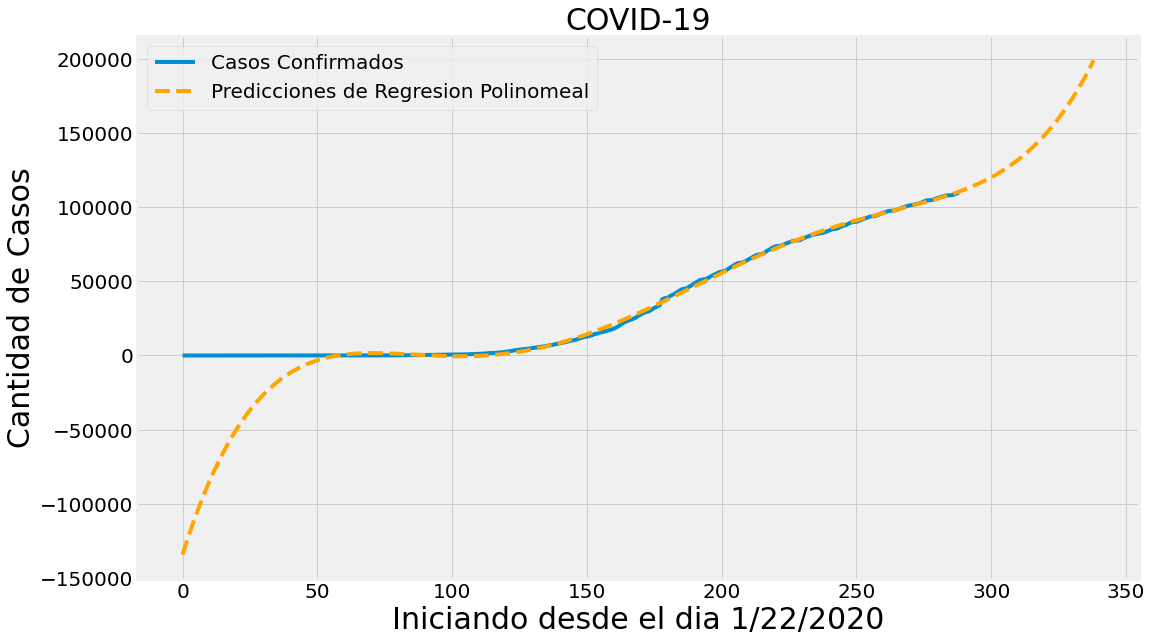

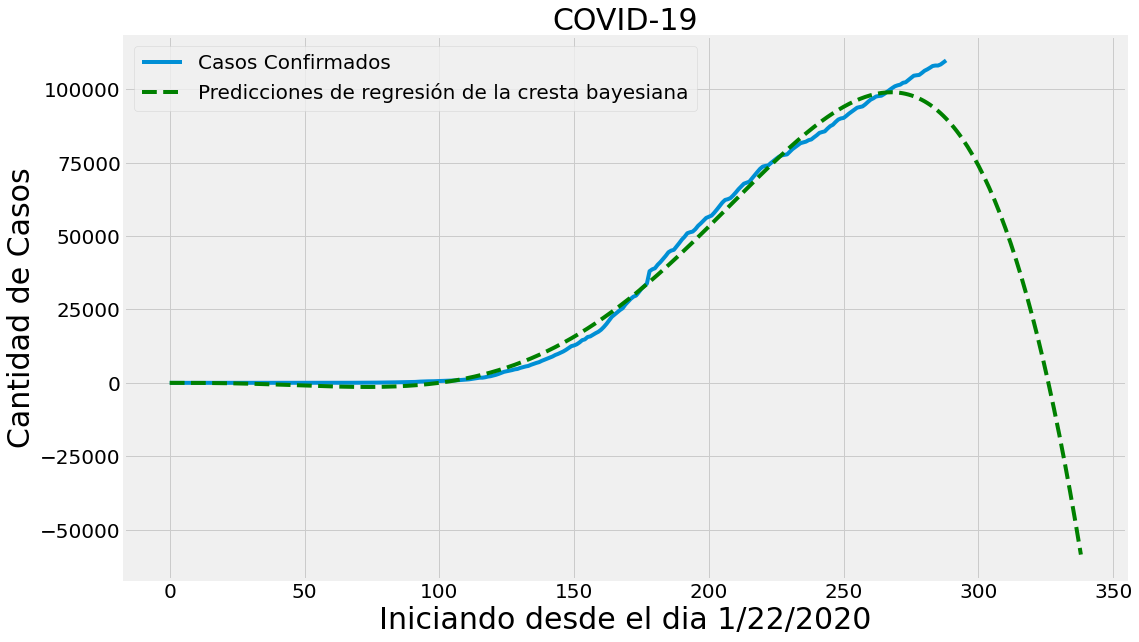

In [40]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
bayesian_search.best_params_
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))


plot_predictions(adjusted_dates, world_cases, linear_pred, 'Predicciones de Regresion Polinomeal', 'orange')
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Predicciones de regresión de la cresta bayesiana', 'green')

MAE: 1220.9763022683994
MSE: 1512154.739229559
MAE: 47.79005893976622
MSE: 4468.5210694445
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.5s finished


MAE: 671.1972393266597
MSE: 481516.93128275167


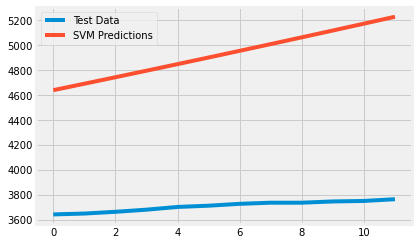

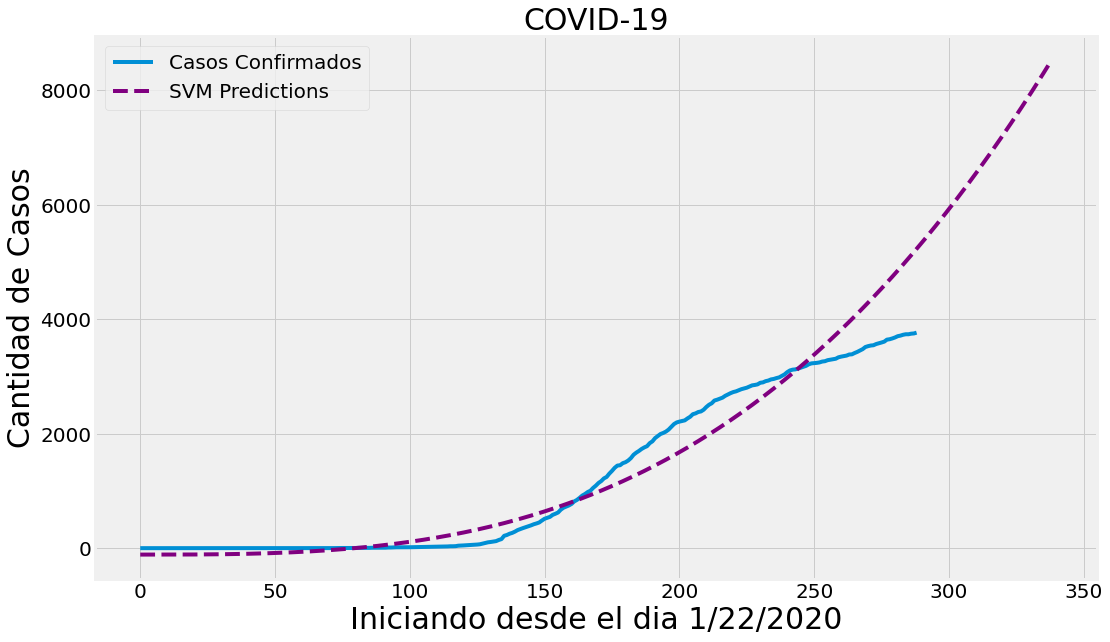

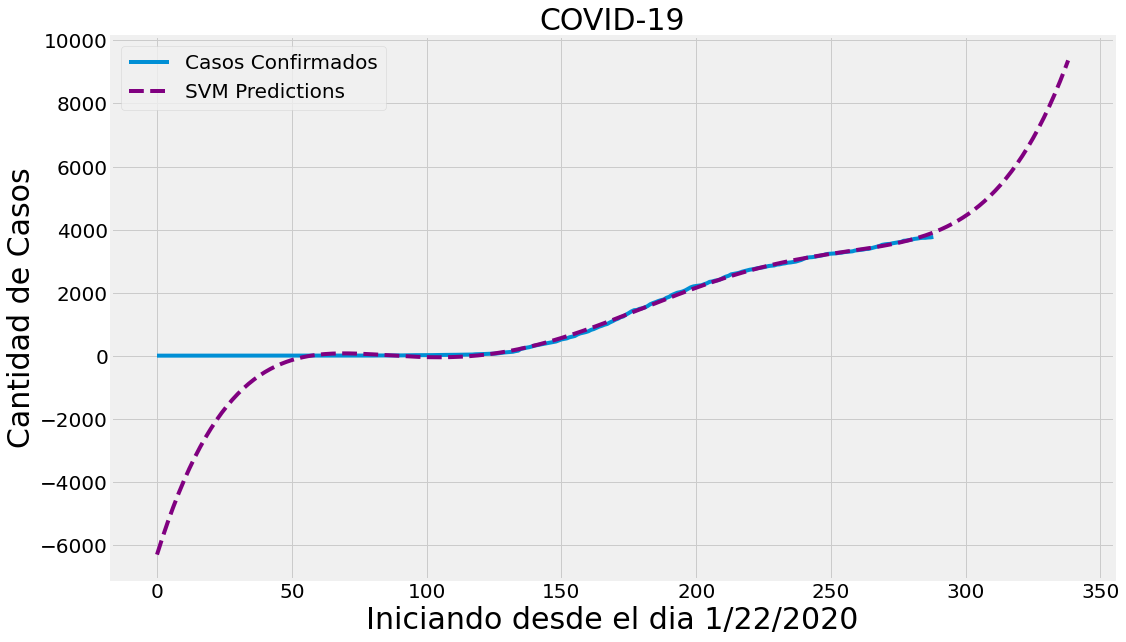

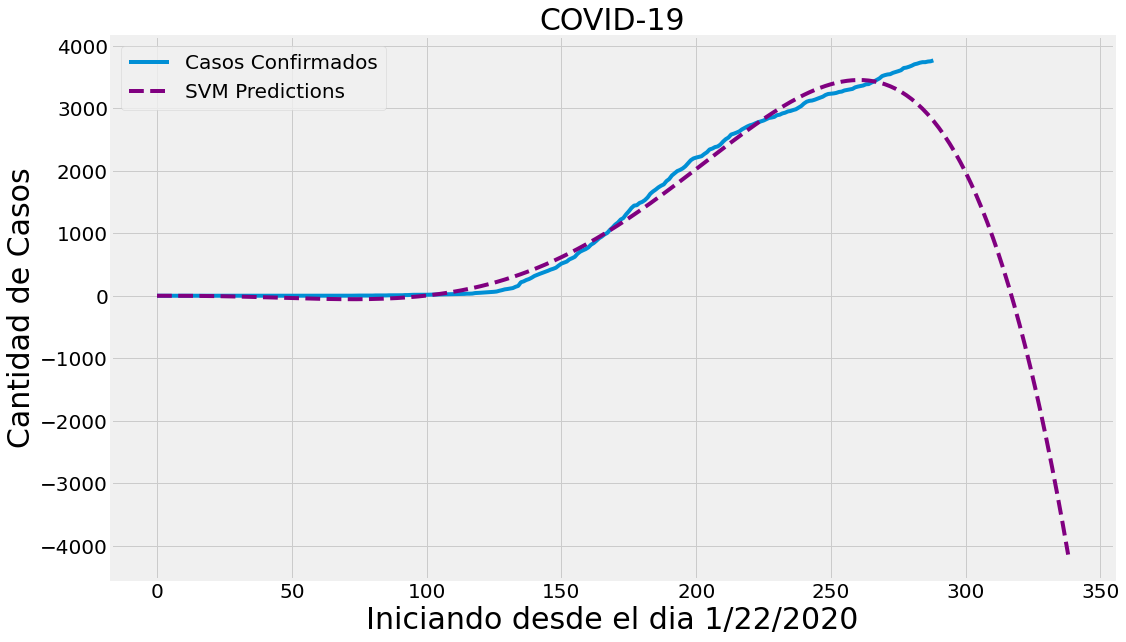

In [41]:
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_22[50:], total_deaths[50:], test_size=0.05, shuffle=False)
svm_death = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_death.fit(X_train_death, y_train_death)
svm_pred_death = svm_death.predict(future_forcast)
svm_test_pred_death = svm_death.predict(X_test_death)
plt.plot(y_test_death)
plt.plot(svm_test_pred_death)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred_death, y_test_death))
print('MSE:',mean_squared_error(svm_test_pred_death, y_test_death))

poly = PolynomialFeatures(degree=5)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_death = bayesian_poly.fit_transform(X_train_death)
bayesian_poly_X_test_death = bayesian_poly.fit_transform(X_test_death)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_death, y_train_death)
test_linear_pred = linear_model.predict(poly_X_test_death)
linear_pred_death = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_death, y_train_death)
bayesian_search.best_params_
bayesian_death = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_death.predict(bayesian_poly_X_test_death)
bayesian_pred = bayesian_death.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_death))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_death))

plot_predictions(adjusted_dates, total_deaths, svm_pred_death, 'SVM Predictions', 'purple')
plot_predictions(adjusted_dates, total_deaths, linear_pred_death, 'SVM Predictions', 'purple')
plot_predictions(adjusted_dates, total_deaths, bayesian_pred, 'SVM Predictions', 'purple')

MAE: 8423.053379849685
MSE: 76645893.6777219
Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.0s finished


MAE: 16465.611451263558
MSE: 297712598.4594372


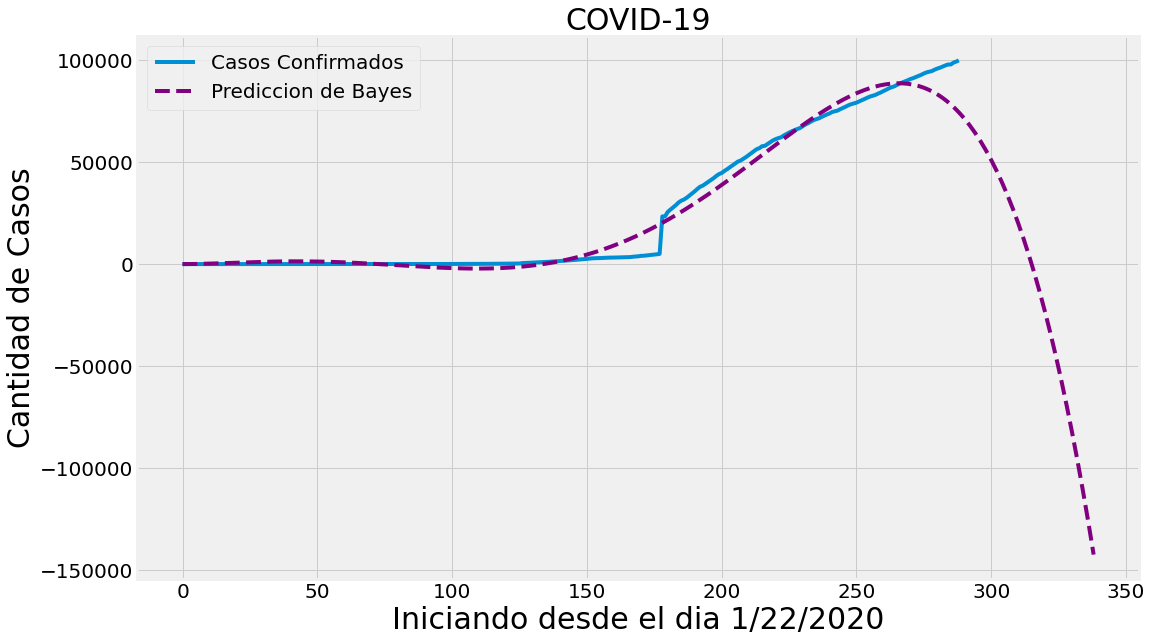

In [42]:
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22[50:], total_recovered[50:], test_size=0.05, shuffle=False)
poly = PolynomialFeatures(degree=5)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_recovered = bayesian_poly.fit_transform(X_train_recovered)
bayesian_poly_X_test_recovered = bayesian_poly.fit_transform(X_test_recovered)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_recovered, y_train_recovered)
test_linear_pred = linear_model.predict(poly_X_test_recovered)
linear_pred_recovered = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_linear_pred, y_test_recovered))

tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_recovered, y_train_recovered)
bayesian_search.best_params_
bayesian_recovered = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_recovered.predict(bayesian_poly_X_test_recovered)
bayesian_pred = bayesian_recovered.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_recovered))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_recovered))
plot_predictions(adjusted_dates, total_recovered, bayesian_pred, 'Prediccion de Bayes', 'purple')

In [43]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '10/27/20', '10/28/20', '10/29/20', '10/30/20', '10/31/20', '11/1/20',
       '11/2/20', '11/3/20', '11/4/20', '11/5/20'],
      dtype='object', length=289)